# Executables:
- `Start-Process "C:\Program Files\Docker\Docker\Docker Desktop.exe"` (inicia o Docker Desktop)
- `Get-Service *docker*` (verifica o status do serviço Docker)
- `cd .\airflow\Instalação` (navega para o diretório com docker-compose.yaml)
- `docker compose up -d` (inicia os serviços do Airflow em background)
- `docker compose ps` (verifica o status dos containers)

# S1 Introdução
## Apache Airflow
- Open Source - Criado pelo Airbnb em 2015. Mantido pela fundação Apache.
- Desenvolvido em Python
- Extensível

### É um orquestrador:
- Airflow não processa dados, ele coordena o processamento
- Orquestra workloads (principalmente batch)
    - Sensores e operadores "deferrable" -> permite `near real time`
- O processamento ocorre em:
    - Sistema Operacional
    - Banco de Dados
    - Spark
    - Elastic Search
    - Etc.
- Interfaces:
    - Web
    - Rest API
    - CLI
- **DAG: estrutura básica e principal do Airflow, é um pipeline**
- Um pipeline é composto por tasks que são partes dele, possui características como:
    - Precedência
    - Parelismo
    - Independência

## Pipeline:
- Erros
- Log/Auditoria
- Monitoramento/Alertas
- Recuperação a partir de um Ponto
- Dados Históricos/ Diferenciação
- Alta disponibilidade
- Distribuição de Carga"

# Como funciona o Airflow:
- DAG é um pipeline do Airflow
    - O que este pipeline vai fazer ?
- Formada por Operador e Task
- **Arquitetura**:
    - Webserver (UI)
    - Scheduler
    - Executor
    - Metadata DB
    - Triggerer
    - Queue
- `DAG = Directed acyclic graph: Grafo **direcionado** acíclico` 
    - Grafo: Conjunto de Vértices e Arestas
    - Direcionado: Possui Direção Específica
    - Acíclico: Não Circular
    - DAG é um script python
    - Não precisa ter a lógica (classe externa)
    - Um mesmo script pode ter múltiplas DAGs
    - Uma DAG pode ter uma ou mais tasks
    - Tasks possuem dependência
    - Um arquivo DAG pode ter uma ou mais de duas DAGs

- Operators: definição do trabalho:
    - Definem o 'o que fazer' no pipeline
    - Derivam de **BaseOperator**
    - Instanciados na DAG viram **Tasks**
- Tasks: Instância de um operador na DAG
- Interação com outras ferramentas:
    - AWS
    - Databricks
    - MySQL
    - MongoDB

# S2 Preparando o ambiente:

- Pré-requisitos:
    - Instalação Docker
    - IDE: VSCODE
    - Instalar Airflow com Docker

- Instalar Airflow com Docker
    - 1. Crie uma pasta "airflow"
    - 2. Salve os seguintes arquivos na pasta:
        - docker-compose.yaml: `C:\Users\marco\OneDrive\Área de Trabalho\class\Forma-o-Completa-Apache-Airflow-3.1\material\Instalação\docker-compose.yaml`
        - .env
    - 3. Navegue para o diretório: `cd .\airflow\Instalação`
    - 4. Execute os comandos Docker conforme a lista de Executables acima

# S4 Estrutura básica de uma DAG

```python
###### MÓDULOS ######
import pendulum
from airflow import DAG
from airflow.operators.bash import BashOperator

###### DAG ######
# Tudo dentro do contexto da DAG use a DAG de forma automática
# Reaproveitamento de código
`O nome da DAG não é o nome do .py !`
with DAG(
    dag_id = "meu_primeiro_dag",
    description = "Minha primeira DAG no Airflow",
    schedule = None, # Sem agendamento
    start_date=pendulum.datetime(2024, 1, 1, tz="America/Sao_Paulo"),
    catchup = False, # Se a DAG falhar ele executa execuções passadas que ficaram pendentes
    tags=["curso", "exemplo"],
) as dag:
###### TASKS ######
    task1 = BashOperator(
        task_id = "task1",
        bash_command = "sleep 5",
    ),
    task2 = BashOperator(
        task_id = "task2",
        bash_command = "echo 'Hello, Airflow!'",
    )
    task3 = BashOperator(
        task_id = "task3",
        bash_command = "date",
    )
##### Ordem de precedência / Execução ######
    task1 >> task2 >> task3 # Indica a ordem de execução
```

## Parametros principais da DAG:
- dag_id: nome único da DAG
- description: descricao da DAG
- schedule: agendamento da DAG
- start_date: data de inicio da DAG
- end_date: data de fim da DAG
- catchup: Se a DAG falhar ele executa execuções passadas que ficaram pendentes
- default_view: visão padrão na interface web
- max_active_runs: número máximo de execuções simultâneas da DAG
- Max_active_tasks: número máximo de tasks ativas simultâneas na DAG
- tags: categorias da DAG
- default_args: argumentos padrão para todas as tasks na DAG
- owner: proprietário da DAG
- retries: número de tentativas em caso de falha
- retry_delay: tempo de espera entre tentativas
- retry_exponential_backoff: se verdadeiro, o tempo de espera entre tentativas aumenta exponencialmente
- depends_on_past: se verdadeiro, a task só será executada se a execução anterior tiver sido bem-sucedida
- wait_for_downstream: se verdadeiro, a task só será executada se todas as tasks downstream da execução anterior tiverem sido bem-sucedidas
- trigger_rule: regra para determinar quando a task deve ser executada com base no estado das tasks upstream
- sla: Acordo de Nível de Serviço para a task
- on_failure_callback: função a ser chamada em caso de falha da task
- on_success_callback: função a ser chamada em caso de sucesso da task
- on_retry_callback: função a ser chamada em caso de nova tentativa da task
- pool: pool de recursos para a task
- pool_slots: número de slots no pool a serem usados pela task
- priority_weight: peso de prioridade da task
- weight_rule: regra para calcular o peso da task
- queue: fila para a task

# Expressões CRON:
- `* * * * *`
- Minuto (0 - 59)
- Hora (0 - 23)
- Dia do mês (1 - 31)
- Mês (1 - 12)
- Dia da semana (0 - 6)

## Exemplos CRON:
- `0 0 * * *` - Executa diariamente à meia-noite
- `0 12 * * 1-5` - Executa às 12:00 de segunda a sexta-feira
- `0 0 1 * *` - Executa no primeiro dia de cada mês 
- `*/15 * * * *` - Executa a cada 15 minutos
- `0 0 * * 0` - Executa todo domingo à meia-noite

## A cada 5 horas, começando 11 de março de 2026 as 00:00 e terminando 20 de março de 2026 as 00:00:
- `0 */5 * * *`
- start_date=pendulum.datetime(2026, 3, 11, 0, 0, 0, tz="America/Sao_Paulo")
- end_date=pendulum.datetime(2026, 3, 20, 0, 0, 0, tz="America/Sao_Paulo")

# Trigger Rules (regras de gatilho):
- `all_success (padrão): A task será executada somente se todas as tasks upstream tiverem sido bem-sucedidas.`
- all_failed: A task será executada somente se todas as tasks upstream tiverem falhado.
- all_done: A task será executada quando todas as tasks upstream tiverem sido concluídas
- all_skipped: A task será executada somente se todas as tasks upstream tiverem sido ignoradas.
- all_done_min_one_success: A task será executada quando todas as tasks upstream tiverem sido concluídas e pelo menos uma delas tiver sido bem-sucedida.
- one_success: A task será executada se pelo menos uma das tasks upstream tiver sido bem-sucedida.
- one_failed: A task será executada se pelo menos uma das tasks upstream tiver falhado.
- none_failed: A task será executada se nenhuma das tasks upstream tiver falhado.
- none_failed_min_one_success: A task será executada se nenhuma das tasks upstream tiver falhado e pelo menos uma delas tiver sido bem-sucedida.
- none_skipped: A task será executada se nenhuma das tasks upstream tiver sido ignorada.
- always: A task será executada independentemente do estado das tasks upstream.
- `RollBack: Se uma task falhar, todas as tasks downstream serão revertidas para o estado anterior.`
- `All_sucess: A task será executada somente se todas as tasks upstream tiverem sido bem-sucedidas.`
- `FastFail: Se uma task falhar, todas as tasks downstream serão imediatamente marcadas como falhadas.`


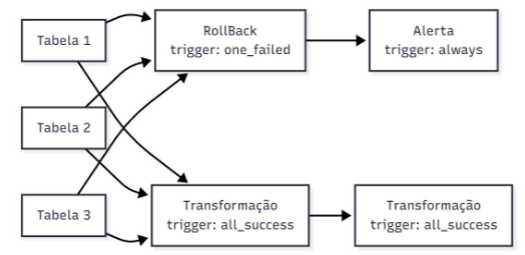

# Operator mais comuns:
- BashOperator: Executa comandos bash
- PythonOperator: Executa funções Python
- EmptyOperator: Operador vazio, usado para criar dependências
- BranchPythonOperator: Permite criar ramificações condicionais no fluxo de trabalho com base em uma função Python.
- BranchOperator: Permite criar ramificações condicionais no fluxo de trabalho com base em uma expressão booleana.
- TriggerDagRunOperator: Aciona a execução de outra DAG.
- SQLExecuteOperator: Executa comandos SQL em um banco de dados.
- HttpOperator: Executa requisições HTTP.
- EmailOperator: Envia e-mails.
- FileSensor: Monitora a existência de um arquivo em um sistema de arquivos.
- HttpSensor: Monitora a disponibilidade de um endpoint HTTP.


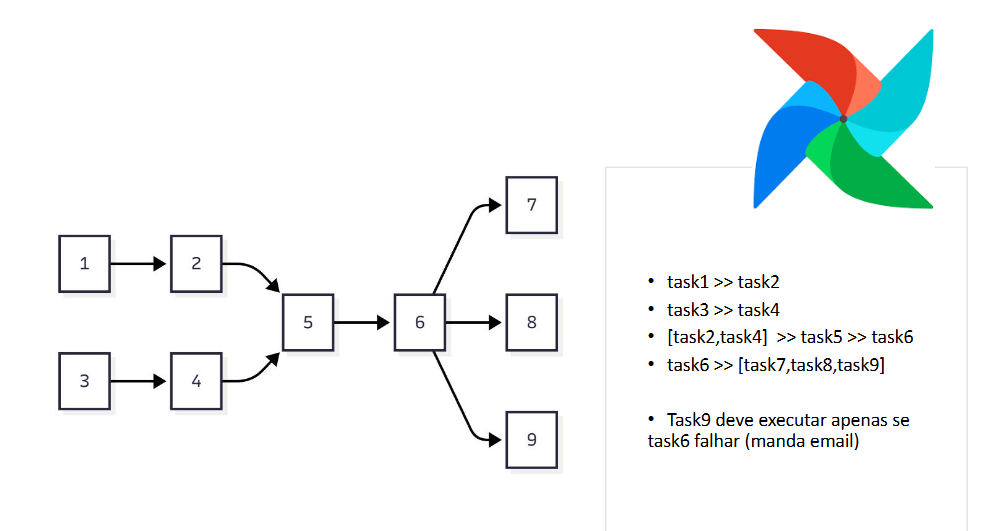


# TaskGroup:
- Agrupa tasks logicamente dentro de uma DAG
- Exemplo DAG GROUP.
```python
###### MÓDULOS ######
# O airflow está num conteiner, então os módulos são importados do airflow
# Não é necessário instalar nada via pip
import pendulum # Importante para a questão do time-zone
from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.utils.task_group import TaskGroup

###### DAG ######
# Tudo dentro do contexto da DAG use a DAG de forma automática
# Reaproveitamento de código
with DAG(
    dag_id = "dag_group", # Nome único para a DAG
    description = "Task Group",
    schedule = None, # Sem agendamento
    start_date=pendulum.datetime(2024, 1, 1, tz="America/Sao_Paulo"), #Qualquer data passada
    catchup = False, # Se a DAG falhar ele executa execuções passadas que ficaram pendentes
    tags=["curso", "exemplo"],
) as dag:
###### TASKS ######
    task1 = BashOperator(
        task_id = "task1",
        bash_command = "sleep 5",
    )
    task2 = BashOperator(
        task_id = "task2",
        bash_command = "sleep 5",
        # bash_command = "exit 1", # Simula uma falha "upstream failed"
    )
    task3 = BashOperator(
        task_id = "task3",
        bash_command = "sleep 5",
    )
    task4 = BashOperator(
        task_id = "task4",
        bash_command = "sleep 5",
    )
    task5 = BashOperator(
        task_id = "task5",
        bash_command = "sleep 5",
        # bash_command = "exit 1", # Simula uma falha "upstream failed"
    )
    task6 = BashOperator(
        task_id = "task6",
        bash_command = "sleep 5",
    )

    with TaskGroup(group_id="grupo_final") as grupo_final:
        task7 = BashOperator(
            task_id = "task7",
            bash_command = "sleep 5",
        )
        task8 = BashOperator(
            task_id = "task8",
            bash_command = "sleep 5",
            # bash_command = "exit 1", # Simula uma falha "upstream failed"
        )
        task9 = BashOperator(
            task_id = "task9",
            bash_command = "sleep 5",
        )
##### Ordem de precedência / Execução ######
    task1 >> task2
    task3 >> task4
    [ task2 , task4 ] >> task5 >> task6
    task6 >> grupo_final # Grupo final de execução encapsulado no TaskGroup````

# Xcom: troca de dados entre tasks:
- Troca de dados entre Tasks
- Não funcional entre Dags diferentes
- Não deve ser utilizado para dados sensíveis
- `Não deve ser utilizado para grandes volumes de dados`
- PythonOperator por padrão retorna valor como Xcom
- Pode usar JSON serializável ou objetos Python
- Pode ser utilizado:
    - @task
    - Explicitamente com xcom_pull e xcom_push

# DAG que Executa outra DAG:

- Aciona outra Dag imediatamente ou em um horário específico
- Pode passar parâmetros para a DAG acionada

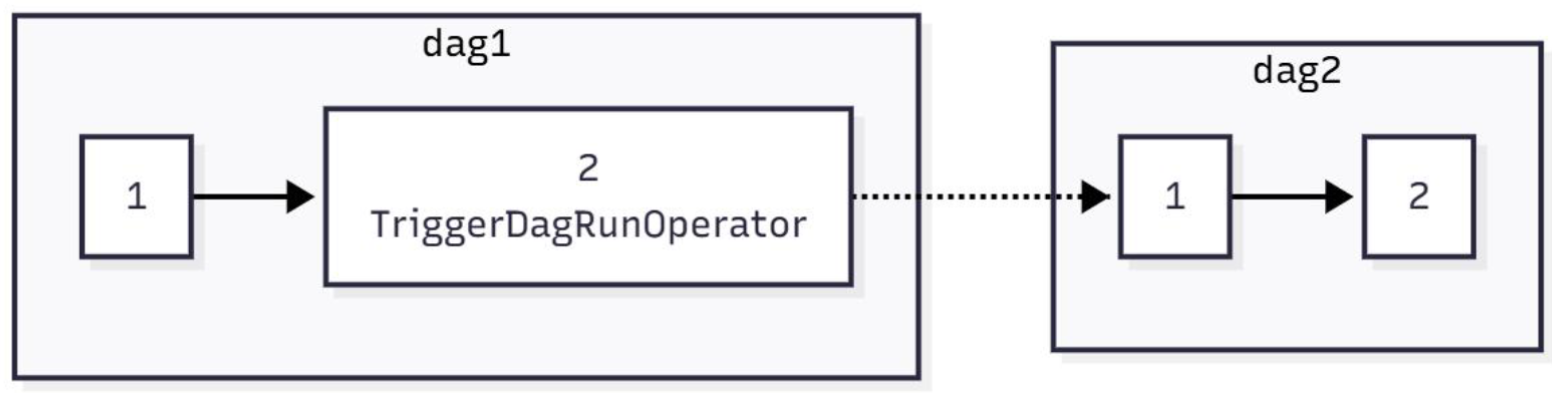